In [1]:
import numpy as np
np.set_printoptions(threshold=1000)

import matplotlib.pyplot as plt
import time
import os
%matplotlib inline

from keras.callbacks import LearningRateScheduler, History

Using TensorFlow backend.


In [2]:
import sys
sys.path.insert(0, '/home/albert/research/vbranch/code/src/')
import evaluation,data, training, models
# from src.bk import models_bk2

In [3]:
# import sys
# sys.path.remove('/home/albert/research/vbranch/code')
sys.path

['/home/ubuntu/DenseNet/',
 '/home/albert/research/DenseNet/',
 '/home/ubuntu/DenseNet/',
 '/home/albert/research/DenseNet/',
 '/home/ubuntu/albert/',
 '/home/albert/research/vbranch/',
 '/home/ubuntu/DenseNet/',
 '/home/albert/research/DenseNet/',
 '/home/albert/research/vbranch/code/src/',
 '',
 '/home/albert/caffe/python',
 '/home/albert/research/vbranch/code',
 '/home/albert/anaconda2/lib/python27.zip',
 '/home/albert/anaconda2/lib/python2.7',
 '/home/albert/anaconda2/lib/python2.7/plat-linux2',
 '/home/albert/anaconda2/lib/python2.7/lib-tk',
 '/home/albert/anaconda2/lib/python2.7/lib-old',
 '/home/albert/anaconda2/lib/python2.7/lib-dynload',
 '/home/albert/anaconda2/lib/python2.7/site-packages',
 '/home/albert/anaconda2/lib/python2.7/site-packages/Sphinx-1.5.6-py2.7.egg',
 '/home/albert/cling/share/cling/Jupyter/kernel',
 '/home/albert/anaconda2/lib/python2.7/site-packages/setuptools-27.2.0-py2.7.egg',
 '/home/albert/anaconda2/lib/python2.7/site-packages/IPython/extensions',
 '/ho

In [4]:
P_param = 5
K_param = 4

In [5]:
train_dict, train_files = data.get_data('train')

0.0818281173706


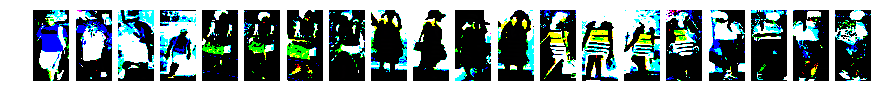

In [6]:
start = time.time()
batch = data.batch_generator(train_dict, P=P_param, K=K_param, preprocess=True,
                                    shape=(256,128)).next()
print time.time() - start

i = 0

plt.figure(figsize=(15,2))
for j in range(P_param*K_param):
    plt.subplot(1,20,j+1)
    im = batch[0][i][j].squeeze().astype(np.uint8)
#         print im.min(), im.max()
    plt.imshow(im)
    plt.axis('off')
plt.show()

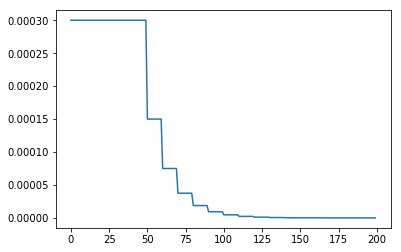

In [7]:
epochs = 10
steps_per_epoch = 100

lr = []
for era in range(1,21):
#     exec(step_decay_cont_str % (epochs, era))
    for j in range(10):
        lr.append(training.step_decay_cont(epochs, era)(j))
plt.plot(np.arange(200), lr)

In [8]:
model, base, _ = models.DenseNetDrop(P_param=P_param, K_param=K_param,
                                    weights='imagenet', diagnostic=True, 
                                  blocks=4, tile=True)

# model, _, _ = models_bk2.DenseNet121Drop(P_param=P_param, K_param=K_param,
#                                     weights='imagenet', diagnostic=True)

called 0
[64]
[64]
[-1, 0, 1, 2, 3]
called 0
[64]
[64]
called 0
[128]
[128]
called 0
[96]
[96]
called 0
[128]
[128]
called 0
[128]
[128]
called 0
[128]
[128]
called 0
[160]
[160]
called 0
[128]
[128]
called 0
[192]
[192]
called 0
[128]
[128]
called 0
[224]
[224]
called 0
[128]
[128]
called 0
[256]
[256]
called 0
[128]
[128]
called 0
[128]
[128]
called 0
[160]
[160]
called 0
[128]
[128]
called 0
[192]
[192]
called 0
[128]
[128]
called 0
[224]
[224]
called 0
[128]
[128]
called 0
[256]
[256]
called 0
[128]
[128]
called 0
[288]
[288]
called 0
[128]
[128]
called 0
[320]
[320]
called 0
[128]
[128]
called 0
[352]
[352]
called 0
[128]
[128]
called 0
[384]
[384]
called 0
[128]
[128]
called 0
[416]
[416]
called 0
[128]
[128]
called 0
[448]
[448]
called 0
[128]
[128]
called 0
[480]
[480]
called 0
[128]
[128]
called 0
[512]
[512]
called 0
[256]
[256]
called 0
[128]
[128]
called 0
[288]
[288]
called 0
[128]
[128]
called 0
[320]
[320]
called 0
[128]
[128]
called 0
[352]
[352]
called 0
[128]
[128]
ca

activation_129 [[<tf.Tensor 'batch_normalization_163_1/cond/Merge:0' shape=(?, 64, 32, 128) dtype=float32>]]
conv2d_127 [[<tf.Tensor 'activation_129_1/Relu:0' shape=(?, 64, 32, 128) dtype=float32>]]
concatenate_61 [[<tf.Tensor 'concatenate_60_1/concat:0' shape=(?, 64, 32, 128) dtype=float32>, <tf.Tensor 'conv2d_127_1/convolution:0' shape=(?, 64, 32, 32) dtype=float32>]]
batch_normalization_164 [[<tf.Tensor 'concatenate_61_1/concat:0' shape=(?, 64, 32, 160) dtype=float32>]]
called 0
[160]
[160]
activation_130 [[<tf.Tensor 'batch_normalization_164_1/cond/Merge:0' shape=(?, 64, 32, 160) dtype=float32>]]
conv2d_128 [[<tf.Tensor 'activation_130_1/Relu:0' shape=(?, 64, 32, 160) dtype=float32>]]
batch_normalization_165 [[<tf.Tensor 'conv2d_128_1/convolution:0' shape=(?, 64, 32, 128) dtype=float32>]]
called 0
[128]
[128]
activation_131 [[<tf.Tensor 'batch_normalization_165_1/cond/Merge:0' shape=(?, 64, 32, 128) dtype=float32>]]
conv2d_129 [[<tf.Tensor 'activation_131_1/Relu:0' shape=(?, 64, 32

batch_normalization_187 [[<tf.Tensor 'concatenate_72_1/concat:0' shape=(?, 32, 16, 384) dtype=float32>]]
called 0
[384]
[384]
activation_153 [[<tf.Tensor 'batch_normalization_187_1/cond/Merge:0' shape=(?, 32, 16, 384) dtype=float32>]]
conv2d_151 [[<tf.Tensor 'activation_153_1/Relu:0' shape=(?, 32, 16, 384) dtype=float32>]]
batch_normalization_188 [[<tf.Tensor 'conv2d_151_1/convolution:0' shape=(?, 32, 16, 128) dtype=float32>]]
called 0
[128]
[128]
activation_154 [[<tf.Tensor 'batch_normalization_188_1/cond/Merge:0' shape=(?, 32, 16, 128) dtype=float32>]]
conv2d_152 [[<tf.Tensor 'activation_154_1/Relu:0' shape=(?, 32, 16, 128) dtype=float32>]]
concatenate_73 [[<tf.Tensor 'concatenate_72_1/concat:0' shape=(?, 32, 16, 384) dtype=float32>, <tf.Tensor 'conv2d_152_1/convolution:0' shape=(?, 32, 16, 32) dtype=float32>]]
batch_normalization_189 [[<tf.Tensor 'concatenate_73_1/concat:0' shape=(?, 32, 16, 416) dtype=float32>]]
called 0
[416]
[416]
activation_155 [[<tf.Tensor 'batch_normalization_

[128]
activation_173 [[<tf.Tensor 'batch_normalization_207_1/cond/Merge:0' shape=(?, 16, 8, 128) dtype=float32>]]
conv2d_171 [[<tf.Tensor 'activation_173_1/Relu:0' shape=(?, 16, 8, 128) dtype=float32>]]
concatenate_82 [[<tf.Tensor 'concatenate_81_1/concat:0' shape=(?, 16, 8, 416) dtype=float32>, <tf.Tensor 'conv2d_171_1/convolution:0' shape=(?, 16, 8, 32) dtype=float32>]]
batch_normalization_208 [[<tf.Tensor 'concatenate_82_1/concat:0' shape=(?, 16, 8, 448) dtype=float32>]]
called 0
[448]
[448]
activation_174 [[<tf.Tensor 'batch_normalization_208_1/cond/Merge:0' shape=(?, 16, 8, 448) dtype=float32>]]
conv2d_172 [[<tf.Tensor 'activation_174_1/Relu:0' shape=(?, 16, 8, 448) dtype=float32>]]
batch_normalization_209 [[<tf.Tensor 'conv2d_172_1/convolution:0' shape=(?, 16, 8, 128) dtype=float32>]]
called 0
[128]
[128]
activation_175 [[<tf.Tensor 'batch_normalization_209_1/cond/Merge:0' shape=(?, 16, 8, 128) dtype=float32>]]
conv2d_173 [[<tf.Tensor 'activation_175_1/Relu:0' shape=(?, 16, 8, 12

batch_normalization_228 [[<tf.Tensor 'concatenate_92_1/concat:0' shape=(?, 16, 8, 768) dtype=float32>]]
called 0
[768]
[768]
activation_194 [[<tf.Tensor 'batch_normalization_228_1/cond/Merge:0' shape=(?, 16, 8, 768) dtype=float32>]]
conv2d_192 [[<tf.Tensor 'activation_194_1/Relu:0' shape=(?, 16, 8, 768) dtype=float32>]]
batch_normalization_229 [[<tf.Tensor 'conv2d_192_1/convolution:0' shape=(?, 16, 8, 128) dtype=float32>]]
called 0
[128]
[128]
activation_195 [[<tf.Tensor 'batch_normalization_229_1/cond/Merge:0' shape=(?, 16, 8, 128) dtype=float32>]]
conv2d_193 [[<tf.Tensor 'activation_195_1/Relu:0' shape=(?, 16, 8, 128) dtype=float32>]]
concatenate_93 [[<tf.Tensor 'concatenate_92_1/concat:0' shape=(?, 16, 8, 768) dtype=float32>, <tf.Tensor 'conv2d_193_1/convolution:0' shape=(?, 16, 8, 32) dtype=float32>]]
batch_normalization_230 [[<tf.Tensor 'concatenate_93_1/concat:0' shape=(?, 16, 8, 800) dtype=float32>]]
called 0
[800]
[800]
activation_196 [[<tf.Tensor 'batch_normalization_230_1/con

activation_214 [[<tf.Tensor 'batch_normalization_126_1/cond/Merge:0' shape=(?, 8, 4, 128) dtype=float32>]]
conv2d_212 [[<tf.Tensor 'activation_214_1/Relu:0' shape=(?, 8, 4, 128) dtype=float32>]]
concatenate_102 [[<tf.Tensor 'concatenate_101_1/concat:0' shape=(?, 8, 4, 544) dtype=float32>, <tf.Tensor 'conv2d_212_1/convolution:0' shape=(?, 8, 4, 32) dtype=float32>]]
batch_normalization_127 [[<tf.Tensor 'concatenate_102_1/concat:0' shape=(?, 8, 4, 576) dtype=float32>]]
activation_215 [[<tf.Tensor 'batch_normalization_127_1/cond/Merge:0' shape=(?, 8, 4, 576) dtype=float32>]]
conv2d_213 [[<tf.Tensor 'activation_215_1/Relu:0' shape=(?, 8, 4, 576) dtype=float32>]]
idx [24578, 4]
gather [24578]
batch_normalization_128 [[<tf.Tensor 'conv2d_213_1/convolution:0' shape=(?, 8, 4, 128) dtype=float32>]]
activation_216 [[<tf.Tensor 'batch_normalization_128_1/cond/Merge:0' shape=(?, 8, 4, 128) dtype=float32>]]
conv2d_214 [[<tf.Tensor 'activation_216_1/Relu:0' shape=(?, 8, 4, 128) dtype=float32>]]
conca

activation_235 [[<tf.Tensor 'batch_normalization_147_1/cond/Merge:0' shape=(?, 8, 4, 896) dtype=float32>]]
conv2d_233 [[<tf.Tensor 'activation_235_1/Relu:0' shape=(?, 8, 4, 896) dtype=float32>]]
idx [38238, 4]
gather [38238]
batch_normalization_148 [[<tf.Tensor 'conv2d_233_1/convolution:0' shape=(?, 8, 4, 128) dtype=float32>]]
activation_236 [[<tf.Tensor 'batch_normalization_148_1/cond/Merge:0' shape=(?, 8, 4, 128) dtype=float32>]]
conv2d_234 [[<tf.Tensor 'activation_236_1/Relu:0' shape=(?, 8, 4, 128) dtype=float32>]]
concatenate_113 [[<tf.Tensor 'concatenate_112_1/concat:0' shape=(?, 8, 4, 896) dtype=float32>, <tf.Tensor 'conv2d_234_1/convolution:0' shape=(?, 8, 4, 32) dtype=float32>]]
batch_normalization_149 [[<tf.Tensor 'concatenate_113_1/concat:0' shape=(?, 8, 4, 928) dtype=float32>]]
activation_237 [[<tf.Tensor 'batch_normalization_149_1/cond/Merge:0' shape=(?, 8, 4, 928) dtype=float32>]]
conv2d_235 [[<tf.Tensor 'activation_237_1/Relu:0' shape=(?, 8, 4, 928) dtype=float32>]]
idx [

concatenate_64 [[<tf.Tensor 'concatenate_63_2/concat:0' shape=(?, 64, 32, 224) dtype=float32>, <tf.Tensor 'conv2d_133_2/convolution:0' shape=(?, 64, 32, 32) dtype=float32>]]
batch_normalization_170 [[<tf.Tensor 'concatenate_64_2/concat:0' shape=(?, 64, 32, 256) dtype=float32>]]
called 0
[256]
[256]
activation_136 [[<tf.Tensor 'batch_normalization_170_2/cond/Merge:0' shape=(?, 64, 32, 256) dtype=float32>]]
conv2d_134 [[<tf.Tensor 'activation_136_2/Relu:0' shape=(?, 64, 32, 256) dtype=float32>]]
average_pooling2d_4 [[<tf.Tensor 'conv2d_134_2/convolution:0' shape=(?, 64, 32, 128) dtype=float32>]]
batch_normalization_171 [[<tf.Tensor 'average_pooling2d_4_2/AvgPool:0' shape=(?, 32, 16, 128) dtype=float32>]]
called 0
[128]
[128]
activation_137 [[<tf.Tensor 'batch_normalization_171_2/cond/Merge:0' shape=(?, 32, 16, 128) dtype=float32>]]
conv2d_135 [[<tf.Tensor 'activation_137_2/Relu:0' shape=(?, 32, 16, 128) dtype=float32>]]
batch_normalization_172 [[<tf.Tensor 'conv2d_135_2/convolution:0' sh

called 0
[256]
[256]
activation_162 [[<tf.Tensor 'batch_normalization_196_2/cond/Merge:0' shape=(?, 16, 8, 256) dtype=float32>]]
conv2d_160 [[<tf.Tensor 'activation_162_2/Relu:0' shape=(?, 16, 8, 256) dtype=float32>]]
batch_normalization_197 [[<tf.Tensor 'conv2d_160_2/convolution:0' shape=(?, 16, 8, 128) dtype=float32>]]
called 0
[128]
[128]
activation_163 [[<tf.Tensor 'batch_normalization_197_2/cond/Merge:0' shape=(?, 16, 8, 128) dtype=float32>]]
conv2d_161 [[<tf.Tensor 'activation_163_2/Relu:0' shape=(?, 16, 8, 128) dtype=float32>]]
concatenate_77 [[<tf.Tensor 'average_pooling2d_5_2/AvgPool:0' shape=(?, 16, 8, 256) dtype=float32>, <tf.Tensor 'conv2d_161_2/convolution:0' shape=(?, 16, 8, 32) dtype=float32>]]
batch_normalization_198 [[<tf.Tensor 'concatenate_77_2/concat:0' shape=(?, 16, 8, 288) dtype=float32>]]
called 0
[288]
[288]
activation_164 [[<tf.Tensor 'batch_normalization_198_2/cond/Merge:0' shape=(?, 16, 8, 288) dtype=float32>]]
conv2d_162 [[<tf.Tensor 'activation_164_2/Relu:0

called 0
[672]
[672]
activation_188 [[<tf.Tensor 'batch_normalization_222_2/cond/Merge:0' shape=(?, 16, 8, 672) dtype=float32>]]
conv2d_186 [[<tf.Tensor 'activation_188_2/Relu:0' shape=(?, 16, 8, 672) dtype=float32>]]
batch_normalization_223 [[<tf.Tensor 'conv2d_186_2/convolution:0' shape=(?, 16, 8, 128) dtype=float32>]]
called 0
[128]
[128]
activation_189 [[<tf.Tensor 'batch_normalization_223_2/cond/Merge:0' shape=(?, 16, 8, 128) dtype=float32>]]
conv2d_187 [[<tf.Tensor 'activation_189_2/Relu:0' shape=(?, 16, 8, 128) dtype=float32>]]
concatenate_90 [[<tf.Tensor 'concatenate_89_2/concat:0' shape=(?, 16, 8, 672) dtype=float32>, <tf.Tensor 'conv2d_187_2/convolution:0' shape=(?, 16, 8, 32) dtype=float32>]]
batch_normalization_224 [[<tf.Tensor 'concatenate_90_2/concat:0' shape=(?, 16, 8, 704) dtype=float32>]]
called 0
[704]
[704]
activation_190 [[<tf.Tensor 'batch_normalization_224_2/cond/Merge:0' shape=(?, 16, 8, 704) dtype=float32>]]
conv2d_188 [[<tf.Tensor 'activation_190_2/Relu:0' shap

ip_332 [[]]
l_333 [[<tf.Tensor 'conv2d_209_2/convolution:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_9:0' shape=(128,) dtype=float32>]]
ip_334 [[]]
l_335 [[<tf.Tensor 'conv2d_209_3/convolution:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_10:0' shape=(128,) dtype=float32>]]
ip_336 [[]]
l_337 [[<tf.Tensor 'conv2d_209_4/convolution:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_11:0' shape=(128,) dtype=float32>]]
batch_normalization_124 [[<tf.Tensor 'lambda_10/Mul:0' shape=(?, 8, 4, 128) dtype=float32>], [<tf.Tensor 'lambda_11/Mul:0' shape=(?, 8, 4, 128) dtype=float32>], [<tf.Tensor 'lambda_12/Mul:0' shape=(?, 8, 4, 128) dtype=float32>]]
ip_339 [[]]
l_340 [[<tf.Tensor 'batch_normalization_124_2/cond/Merge:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_12:0' shape=(128,) dtype=float32>]]
ip_341 [[]]
l_342 [[<tf.Tensor 'batch_normalization_124_3/cond/Merge:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_13:0' shape=(128,) dtype=floa

ip_422 [[]]
l_423 [[<tf.Tensor 'conv2d_213_4/convolution:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_47:0' shape=(128,) dtype=float32>]]
batch_normalization_128 [[<tf.Tensor 'lambda_46/Mul:0' shape=(?, 8, 4, 128) dtype=float32>], [<tf.Tensor 'lambda_47/Mul:0' shape=(?, 8, 4, 128) dtype=float32>], [<tf.Tensor 'lambda_48/Mul:0' shape=(?, 8, 4, 128) dtype=float32>]]
ip_425 [[]]
l_426 [[<tf.Tensor 'batch_normalization_128_2/cond/Merge:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_48:0' shape=(128,) dtype=float32>]]
ip_427 [[]]
l_428 [[<tf.Tensor 'batch_normalization_128_3/cond/Merge:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_49:0' shape=(128,) dtype=float32>]]
ip_429 [[]]
l_430 [[<tf.Tensor 'batch_normalization_128_4/cond/Merge:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_50:0' shape=(128,) dtype=float32>]]
activation_216 [[<tf.Tensor 'lambda_49/Mul:0' shape=(?, 8, 4, 128) dtype=float32>], [<tf.Tensor 'lambda_50/Mul:0' shape=(?, 8, 4, 1

ip_513 [[]]
l_514 [[<tf.Tensor 'batch_normalization_132_3/cond/Merge:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_85:0' shape=(128,) dtype=float32>]]
ip_515 [[]]
l_516 [[<tf.Tensor 'batch_normalization_132_4/cond/Merge:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_86:0' shape=(128,) dtype=float32>]]
activation_220 [[<tf.Tensor 'lambda_85/Mul:0' shape=(?, 8, 4, 128) dtype=float32>], [<tf.Tensor 'lambda_86/Mul:0' shape=(?, 8, 4, 128) dtype=float32>], [<tf.Tensor 'lambda_87/Mul:0' shape=(?, 8, 4, 128) dtype=float32>]]
ip_518 [[]]
l_519 [[<tf.Tensor 'activation_220_2/Relu:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_87:0' shape=(128,) dtype=float32>]]
ip_520 [[]]
l_521 [[<tf.Tensor 'activation_220_3/Relu:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_88:0' shape=(128,) dtype=float32>]]
ip_522 [[]]
l_523 [[<tf.Tensor 'activation_220_4/Relu:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_89:0' shape=(128,) dtype=float32>]]
conv2d_218

ip_604 [[]]
l_605 [[<tf.Tensor 'activation_224_2/Relu:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_123:0' shape=(128,) dtype=float32>]]
ip_606 [[]]
l_607 [[<tf.Tensor 'activation_224_3/Relu:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_124:0' shape=(128,) dtype=float32>]]
ip_608 [[]]
l_609 [[<tf.Tensor 'activation_224_4/Relu:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_125:0' shape=(128,) dtype=float32>]]
conv2d_222 [[<tf.Tensor 'lambda_124/Mul:0' shape=(?, 8, 4, 128) dtype=float32>], [<tf.Tensor 'lambda_125/Mul:0' shape=(?, 8, 4, 128) dtype=float32>], [<tf.Tensor 'lambda_126/Mul:0' shape=(?, 8, 4, 128) dtype=float32>]]
ip_611 [[]]
l_612 [[<tf.Tensor 'conv2d_222_2/convolution:0' shape=(?, 8, 4, 32) dtype=float32>, <tf.Tensor 'Const_126:0' shape=(32,) dtype=float32>]]
ip_613 [[]]
l_614 [[<tf.Tensor 'conv2d_222_3/convolution:0' shape=(?, 8, 4, 32) dtype=float32>, <tf.Tensor 'Const_127:0' shape=(32,) dtype=float32>]]
ip_615 [[]]
l_616 [[<tf.Tensor 'co

l_691 [[<tf.Tensor 'activation_228_2/Relu:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_159:0' shape=(128,) dtype=float32>]]
ip_692 [[]]
l_693 [[<tf.Tensor 'activation_228_3/Relu:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_160:0' shape=(128,) dtype=float32>]]
ip_694 [[]]
l_695 [[<tf.Tensor 'activation_228_4/Relu:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_161:0' shape=(128,) dtype=float32>]]
conv2d_226 [[<tf.Tensor 'lambda_160/Mul:0' shape=(?, 8, 4, 128) dtype=float32>], [<tf.Tensor 'lambda_161/Mul:0' shape=(?, 8, 4, 128) dtype=float32>], [<tf.Tensor 'lambda_162/Mul:0' shape=(?, 8, 4, 128) dtype=float32>]]
ip_697 [[]]
l_698 [[<tf.Tensor 'conv2d_226_2/convolution:0' shape=(?, 8, 4, 32) dtype=float32>, <tf.Tensor 'Const_162:0' shape=(32,) dtype=float32>]]
ip_699 [[]]
l_700 [[<tf.Tensor 'conv2d_226_3/convolution:0' shape=(?, 8, 4, 32) dtype=float32>, <tf.Tensor 'Const_163:0' shape=(32,) dtype=float32>]]
ip_701 [[]]
l_702 [[<tf.Tensor 'conv2d_226_4/c

l_788 [[<tf.Tensor 'conv2d_230_4/convolution:0' shape=(?, 8, 4, 32) dtype=float32>, <tf.Tensor 'Const_200:0' shape=(32,) dtype=float32>]]
concatenate_111 [[<tf.Tensor 'concatenate_110_2/concat:0' shape=(?, 8, 4, 832) dtype=float32>, <tf.Tensor 'lambda_199/Mul:0' shape=(?, 8, 4, 32) dtype=float32>], [<tf.Tensor 'concatenate_110_3/concat:0' shape=(?, 8, 4, 832) dtype=float32>, <tf.Tensor 'lambda_200/Mul:0' shape=(?, 8, 4, 32) dtype=float32>], [<tf.Tensor 'concatenate_110_4/concat:0' shape=(?, 8, 4, 832) dtype=float32>, <tf.Tensor 'lambda_201/Mul:0' shape=(?, 8, 4, 32) dtype=float32>]]
batch_normalization_145 [[<tf.Tensor 'concatenate_111_2/concat:0' shape=(?, 8, 4, 864) dtype=float32>], [<tf.Tensor 'concatenate_111_3/concat:0' shape=(?, 8, 4, 864) dtype=float32>], [<tf.Tensor 'concatenate_111_4/concat:0' shape=(?, 8, 4, 864) dtype=float32>]]
ip_791 [[]]
l_792 [[<tf.Tensor 'batch_normalization_145_2/cond/Merge:0' shape=(?, 8, 4, 864) dtype=float32>, <tf.Tensor 'Const_201:0' shape=(864,) d

l_885 [[<tf.Tensor 'activation_237_2/Relu:0' shape=(?, 8, 4, 928) dtype=float32>, <tf.Tensor 'Const_240:0' shape=(928,) dtype=float32>]]
ip_886 [[]]
l_887 [[<tf.Tensor 'activation_237_3/Relu:0' shape=(?, 8, 4, 928) dtype=float32>, <tf.Tensor 'Const_241:0' shape=(928,) dtype=float32>]]
ip_888 [[]]
l_889 [[<tf.Tensor 'activation_237_4/Relu:0' shape=(?, 8, 4, 928) dtype=float32>, <tf.Tensor 'Const_242:0' shape=(928,) dtype=float32>]]
conv2d_235 [[<tf.Tensor 'lambda_241/Mul:0' shape=(?, 8, 4, 928) dtype=float32>], [<tf.Tensor 'lambda_242/Mul:0' shape=(?, 8, 4, 928) dtype=float32>], [<tf.Tensor 'lambda_243/Mul:0' shape=(?, 8, 4, 928) dtype=float32>]]
idx [39604, 4]
gather [39604]
ip_891 [[]]
l_892 [[<tf.Tensor 'conv2d_235_2/convolution:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_243:0' shape=(128,) dtype=float32>]]
ip_893 [[]]
l_894 [[<tf.Tensor 'conv2d_235_3/convolution:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_244:0' shape=(128,) dtype=float32>]]
ip_895 [[]]


ip_977 [[]]
l_978 [[<tf.Tensor 'conv2d_239_2/convolution:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_279:0' shape=(128,) dtype=float32>]]
ip_979 [[]]
l_980 [[<tf.Tensor 'conv2d_239_3/convolution:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_280:0' shape=(128,) dtype=float32>]]
ip_981 [[]]
l_982 [[<tf.Tensor 'conv2d_239_4/convolution:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_281:0' shape=(128,) dtype=float32>]]
batch_normalization_154 [[<tf.Tensor 'lambda_280/Mul:0' shape=(?, 8, 4, 128) dtype=float32>], [<tf.Tensor 'lambda_281/Mul:0' shape=(?, 8, 4, 128) dtype=float32>], [<tf.Tensor 'lambda_282/Mul:0' shape=(?, 8, 4, 128) dtype=float32>]]
ip_984 [[]]
l_985 [[<tf.Tensor 'batch_normalization_154_2/cond/Merge:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_282:0' shape=(128,) dtype=float32>]]
ip_986 [[]]
l_987 [[<tf.Tensor 'batch_normalization_154_3/cond/Merge:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_283:0' shape=(128,) d

(20, 128)
(20, 128)


In [9]:
for l in range(len(base.layers)):
    print l, base.layers[l].name

0 input_3
1 conv2d_241
2 batch_normalization_245
3 activation_245
4 max_pooling2d_3
5 batch_normalization_246
6 activation_246
7 conv2d_242
8 batch_normalization_247
9 activation_247
10 conv2d_243
11 concatenate_117
12 batch_normalization_248
13 activation_248
14 conv2d_244
15 batch_normalization_249
16 activation_249
17 conv2d_245
18 concatenate_118
19 batch_normalization_250
20 activation_250
21 conv2d_246
22 batch_normalization_251
23 activation_251
24 conv2d_247
25 concatenate_119
26 batch_normalization_252
27 activation_252
28 conv2d_248
29 batch_normalization_253
30 activation_253
31 conv2d_249
32 concatenate_120
33 batch_normalization_254
34 activation_254
35 conv2d_250
36 batch_normalization_255
37 activation_255
38 conv2d_251
39 concatenate_121
40 batch_normalization_256
41 activation_256
42 conv2d_252
43 batch_normalization_257
44 activation_257
45 conv2d_253
46 concatenate_122
47 batch_normalization_258
48 activation_258
49 conv2d_254
50 average_pooling2d_7
51 batch_normaliz

In [9]:
for l in range(len(model.layers)):
    print l, model.layers[l].name , model.layers[l].inbound_nodes

0 input_2 [<keras.engine.topology.Node object at 0x7fa485ee9f50>]
1 conv2d_121 [<keras.engine.topology.Node object at 0x7fa48d4b9150>]
2 batch_normalization_157 [<keras.engine.topology.Node object at 0x7fa46cfd2250>]
3 activation_123 [<keras.engine.topology.Node object at 0x7fa46b68ad50>]
4 max_pooling2d_2 [<keras.engine.topology.Node object at 0x7fa46b612550>]
5 batch_normalization_158 [<keras.engine.topology.Node object at 0x7fa46b5c0950>]
6 activation_124 [<keras.engine.topology.Node object at 0x7fa46b68ae50>]
7 conv2d_122 [<keras.engine.topology.Node object at 0x7fa48d4b9850>]
8 batch_normalization_159 [<keras.engine.topology.Node object at 0x7fa46b549c50>]
9 activation_125 [<keras.engine.topology.Node object at 0x7fa46b5fa790>]
10 conv2d_123 [<keras.engine.topology.Node object at 0x7fa48d4b9ad0>]
11 concatenate_59 [<keras.engine.topology.Node object at 0x7fa46b4bee50>, <keras.engine.topology.Node object at 0x7fa46b4beed0>]
12 batch_normalization_160 [<keras.engine.topology.Node ob

In [19]:
model.layers[373].get_config()['kernel_regularizer']['config']['idx'].shape

(69464, 4)

In [20]:
544*86+540*42

69464

In [11]:
# base.layers[313].get_weights()[0] == model.layers[330].get_weights()[0]
np.where((base.layers[316].get_weights()[0] == model.layers[348].get_weights()[0]) == True)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2

In [8]:
import keras.backend as K
mask = K.eval(model.layers[407].output)
print mask

NameError: name 'model' is not defined

In [39]:
from keras.models import Model
import keras.backend as K
test = Model(model.input, model.layers[315].get_output_at(0))

In [40]:
x = test.predict(batch[0])

In [41]:
print x[0,0,0]

[-0.07746678  0.03892235 -0.29267743 -0.16763251 -0.05023682  0.27832225
 -0.04552224 -0.06889057  0.11723467  0.01508243 -0.02710598 -0.00265778
 -0.30692452 -0.05516909 -0.33545771 -0.02623741 -0.03484739 -0.12409534
 -0.00236316 -0.04012705  0.00843214 -0.09832784 -0.15111145  0.00150553
 -0.08948306  0.04169369 -0.04982105  0.13740708  0.20242715 -0.00952799
  0.04728628 -0.16585818 -0.01196199  0.07630756 -0.1673052  -0.12377773
 -0.07157809 -0.10489716 -0.17138386  0.20442382  0.22646485 -0.18388368
  0.02258735 -0.1545774  -0.00307694 -0.24631692  0.12341008  0.00148524
 -0.07614261 -0.08126058 -0.10060959 -0.1489829  -0.12980224  0.02608747
  0.08379327 -0.08551815 -0.15059206 -0.13624468  0.09929171 -0.15585487
  0.0218808   0.09968207  0.00425958  0.04219953 -0.00980009 -0.0823416
 -0.23268668  0.05433373 -0.21483356 -0.09520058 -0.06844777 -0.1345122
  0.05583371  0.06064228  0.07048739  0.14887771 -0.17295152 -0.20265609
 -0.08049185  0.03223233 -0.05294409 -0.03872973 -0.1

In [9]:
model_eval = models.DenseNetDrop(blocks=4, tile=True)

# model_eval = models_bk2.DenseNet121Drop()

[-1, 0, 1, 2, 3]
l_start 310
[-1, 0, 1, 2, 3]
idx [21846, 4]
gather [21846]
idx [23212, 4]
gather [23212]
idx [24578, 4]
gather [24578]
idx [25944, 4]
gather [25944]
idx [27310, 4]
gather [27310]
idx [28676, 4]
gather [28676]
idx [30042, 4]
gather [30042]
idx [31408, 4]
gather [31408]
idx [32774, 4]
gather [32774]
idx [34140, 4]
gather [34140]
idx [35506, 4]
gather [35506]
idx [36872, 4]
gather [36872]
idx [38238, 4]
gather [38238]
idx [39604, 4]
gather [39604]
idx [40970, 4]
gather [40970]
idx [42336, 4]
gather [42336]
conv2d_481 [[<tf.Tensor 'input_320_1:0' shape=(?, 256, 128, 3) dtype=float32>]]
batch_normalization_523 [[<tf.Tensor 'conv2d_481_1/convolution:0' shape=(?, 128, 64, 64) dtype=float32>]]
activation_489 [[<tf.Tensor 'batch_normalization_523_1/cond/Merge:0' shape=(?, 128, 64, 64) dtype=float32>]]
max_pooling2d_5 [[<tf.Tensor 'activation_489_1/Relu:0' shape=(?, 128, 64, 64) dtype=float32>]]
batch_normalization_524 [[<tf.Tensor 'max_pooling2d_5_1/MaxPool:0' shape=(?, 64, 32,

batch_normalization_544 [[<tf.Tensor 'conv2d_501_1/convolution:0' shape=(?, 32, 16, 128) dtype=float32>]]
activation_510 [[<tf.Tensor 'batch_normalization_544_1/cond/Merge:0' shape=(?, 32, 16, 128) dtype=float32>]]
conv2d_502 [[<tf.Tensor 'activation_510_1/Relu:0' shape=(?, 32, 16, 128) dtype=float32>]]
concatenate_243 [[<tf.Tensor 'concatenate_242_1/concat:0' shape=(?, 32, 16, 224) dtype=float32>, <tf.Tensor 'conv2d_502_1/convolution:0' shape=(?, 32, 16, 32) dtype=float32>]]
batch_normalization_545 [[<tf.Tensor 'concatenate_243_1/concat:0' shape=(?, 32, 16, 256) dtype=float32>]]
activation_511 [[<tf.Tensor 'batch_normalization_545_1/cond/Merge:0' shape=(?, 32, 16, 256) dtype=float32>]]
conv2d_503 [[<tf.Tensor 'activation_511_1/Relu:0' shape=(?, 32, 16, 256) dtype=float32>]]
batch_normalization_546 [[<tf.Tensor 'conv2d_503_1/convolution:0' shape=(?, 32, 16, 128) dtype=float32>]]
activation_512 [[<tf.Tensor 'batch_normalization_546_1/cond/Merge:0' shape=(?, 32, 16, 128) dtype=float32>]]

activation_531 [[<tf.Tensor 'batch_normalization_565_1/cond/Merge:0' shape=(?, 16, 8, 128) dtype=float32>]]
conv2d_523 [[<tf.Tensor 'activation_531_1/Relu:0' shape=(?, 16, 8, 128) dtype=float32>]]
concatenate_253 [[<tf.Tensor 'concatenate_252_1/concat:0' shape=(?, 16, 8, 288) dtype=float32>, <tf.Tensor 'conv2d_523_1/convolution:0' shape=(?, 16, 8, 32) dtype=float32>]]
batch_normalization_566 [[<tf.Tensor 'concatenate_253_1/concat:0' shape=(?, 16, 8, 320) dtype=float32>]]
activation_532 [[<tf.Tensor 'batch_normalization_566_1/cond/Merge:0' shape=(?, 16, 8, 320) dtype=float32>]]
conv2d_524 [[<tf.Tensor 'activation_532_1/Relu:0' shape=(?, 16, 8, 320) dtype=float32>]]
batch_normalization_567 [[<tf.Tensor 'conv2d_524_1/convolution:0' shape=(?, 16, 8, 128) dtype=float32>]]
activation_533 [[<tf.Tensor 'batch_normalization_567_1/cond/Merge:0' shape=(?, 16, 8, 128) dtype=float32>]]
conv2d_525 [[<tf.Tensor 'activation_533_1/Relu:0' shape=(?, 16, 8, 128) dtype=float32>]]
concatenate_254 [[<tf.Ten

activation_557 [[<tf.Tensor 'batch_normalization_591_1/cond/Merge:0' shape=(?, 16, 8, 128) dtype=float32>]]
conv2d_549 [[<tf.Tensor 'activation_557_1/Relu:0' shape=(?, 16, 8, 128) dtype=float32>]]
concatenate_266 [[<tf.Tensor 'concatenate_265_1/concat:0' shape=(?, 16, 8, 704) dtype=float32>, <tf.Tensor 'conv2d_549_1/convolution:0' shape=(?, 16, 8, 32) dtype=float32>]]
batch_normalization_592 [[<tf.Tensor 'concatenate_266_1/concat:0' shape=(?, 16, 8, 736) dtype=float32>]]
activation_558 [[<tf.Tensor 'batch_normalization_592_1/cond/Merge:0' shape=(?, 16, 8, 736) dtype=float32>]]
conv2d_550 [[<tf.Tensor 'activation_558_1/Relu:0' shape=(?, 16, 8, 736) dtype=float32>]]
batch_normalization_593 [[<tf.Tensor 'conv2d_550_1/convolution:0' shape=(?, 16, 8, 128) dtype=float32>]]
activation_559 [[<tf.Tensor 'batch_normalization_593_1/cond/Merge:0' shape=(?, 16, 8, 128) dtype=float32>]]
conv2d_551 [[<tf.Tensor 'activation_559_1/Relu:0' shape=(?, 16, 8, 128) dtype=float32>]]
concatenate_267 [[<tf.Ten

concatenate_276 [[<tf.Tensor 'average_pooling2d_15_1/AvgPool:0' shape=(?, 8, 4, 512) dtype=float32>, <tf.Tensor 'conv2d_570_1/convolution:0' shape=(?, 8, 4, 32) dtype=float32>]]
batch_normalization_491 [[<tf.Tensor 'concatenate_276_1/concat:0' shape=(?, 8, 4, 544) dtype=float32>]]
activation_579 [[<tf.Tensor 'batch_normalization_491_1/cond/Merge:0' shape=(?, 8, 4, 544) dtype=float32>]]
conv2d_571 [[<tf.Tensor 'activation_579_1/Relu:0' shape=(?, 8, 4, 544) dtype=float32>]]
idx [23212, 4]
gather [23212]
batch_normalization_492 [[<tf.Tensor 'conv2d_571_1/convolution:0' shape=(?, 8, 4, 128) dtype=float32>]]
activation_580 [[<tf.Tensor 'batch_normalization_492_1/cond/Merge:0' shape=(?, 8, 4, 128) dtype=float32>]]
conv2d_572 [[<tf.Tensor 'activation_580_1/Relu:0' shape=(?, 8, 4, 128) dtype=float32>]]
concatenate_277 [[<tf.Tensor 'concatenate_276_1/concat:0' shape=(?, 8, 4, 544) dtype=float32>, <tf.Tensor 'conv2d_572_1/convolution:0' shape=(?, 8, 4, 32) dtype=float32>]]
batch_normalization_49

activation_599 [[<tf.Tensor 'batch_normalization_511_1/cond/Merge:0' shape=(?, 8, 4, 864) dtype=float32>]]
conv2d_591 [[<tf.Tensor 'activation_599_1/Relu:0' shape=(?, 8, 4, 864) dtype=float32>]]
idx [36872, 4]
gather [36872]
batch_normalization_512 [[<tf.Tensor 'conv2d_591_1/convolution:0' shape=(?, 8, 4, 128) dtype=float32>]]
activation_600 [[<tf.Tensor 'batch_normalization_512_1/cond/Merge:0' shape=(?, 8, 4, 128) dtype=float32>]]
conv2d_592 [[<tf.Tensor 'activation_600_1/Relu:0' shape=(?, 8, 4, 128) dtype=float32>]]
concatenate_287 [[<tf.Tensor 'concatenate_286_1/concat:0' shape=(?, 8, 4, 864) dtype=float32>, <tf.Tensor 'conv2d_592_1/convolution:0' shape=(?, 8, 4, 32) dtype=float32>]]
batch_normalization_513 [[<tf.Tensor 'concatenate_287_1/concat:0' shape=(?, 8, 4, 896) dtype=float32>]]
activation_601 [[<tf.Tensor 'batch_normalization_513_1/cond/Merge:0' shape=(?, 8, 4, 896) dtype=float32>]]
conv2d_593 [[<tf.Tensor 'activation_601_1/Relu:0' shape=(?, 8, 4, 896) dtype=float32>]]
idx [

activation_502 [[<tf.Tensor 'batch_normalization_536_2/cond/Merge:0' shape=(?, 64, 32, 256) dtype=float32>]]
conv2d_494 [[<tf.Tensor 'activation_502_2/Relu:0' shape=(?, 64, 32, 256) dtype=float32>]]
average_pooling2d_13 [[<tf.Tensor 'conv2d_494_2/convolution:0' shape=(?, 64, 32, 128) dtype=float32>]]
batch_normalization_537 [[<tf.Tensor 'average_pooling2d_13_2/AvgPool:0' shape=(?, 32, 16, 128) dtype=float32>]]
activation_503 [[<tf.Tensor 'batch_normalization_537_2/cond/Merge:0' shape=(?, 32, 16, 128) dtype=float32>]]
conv2d_495 [[<tf.Tensor 'activation_503_2/Relu:0' shape=(?, 32, 16, 128) dtype=float32>]]
batch_normalization_538 [[<tf.Tensor 'conv2d_495_2/convolution:0' shape=(?, 32, 16, 128) dtype=float32>]]
activation_504 [[<tf.Tensor 'batch_normalization_538_2/cond/Merge:0' shape=(?, 32, 16, 128) dtype=float32>]]
conv2d_496 [[<tf.Tensor 'activation_504_2/Relu:0' shape=(?, 32, 16, 128) dtype=float32>]]
concatenate_240 [[<tf.Tensor 'average_pooling2d_13_2/AvgPool:0' shape=(?, 32, 16, 

activation_523 [[<tf.Tensor 'batch_normalization_557_2/cond/Merge:0' shape=(?, 32, 16, 448) dtype=float32>]]
conv2d_515 [[<tf.Tensor 'activation_523_2/Relu:0' shape=(?, 32, 16, 448) dtype=float32>]]
batch_normalization_558 [[<tf.Tensor 'conv2d_515_2/convolution:0' shape=(?, 32, 16, 128) dtype=float32>]]
activation_524 [[<tf.Tensor 'batch_normalization_558_2/cond/Merge:0' shape=(?, 32, 16, 128) dtype=float32>]]
conv2d_516 [[<tf.Tensor 'activation_524_2/Relu:0' shape=(?, 32, 16, 128) dtype=float32>]]
concatenate_250 [[<tf.Tensor 'concatenate_249_2/concat:0' shape=(?, 32, 16, 448) dtype=float32>, <tf.Tensor 'conv2d_516_2/convolution:0' shape=(?, 32, 16, 32) dtype=float32>]]
batch_normalization_559 [[<tf.Tensor 'concatenate_250_2/concat:0' shape=(?, 32, 16, 480) dtype=float32>]]
activation_525 [[<tf.Tensor 'batch_normalization_559_2/cond/Merge:0' shape=(?, 32, 16, 480) dtype=float32>]]
conv2d_517 [[<tf.Tensor 'activation_525_2/Relu:0' shape=(?, 32, 16, 480) dtype=float32>]]
batch_normaliza

activation_544 [[<tf.Tensor 'batch_normalization_578_2/cond/Merge:0' shape=(?, 16, 8, 512) dtype=float32>]]
conv2d_536 [[<tf.Tensor 'activation_544_2/Relu:0' shape=(?, 16, 8, 512) dtype=float32>]]
batch_normalization_579 [[<tf.Tensor 'conv2d_536_2/convolution:0' shape=(?, 16, 8, 128) dtype=float32>]]
activation_545 [[<tf.Tensor 'batch_normalization_579_2/cond/Merge:0' shape=(?, 16, 8, 128) dtype=float32>]]
conv2d_537 [[<tf.Tensor 'activation_545_2/Relu:0' shape=(?, 16, 8, 128) dtype=float32>]]
concatenate_260 [[<tf.Tensor 'concatenate_259_2/concat:0' shape=(?, 16, 8, 512) dtype=float32>, <tf.Tensor 'conv2d_537_2/convolution:0' shape=(?, 16, 8, 32) dtype=float32>]]
batch_normalization_580 [[<tf.Tensor 'concatenate_260_2/concat:0' shape=(?, 16, 8, 544) dtype=float32>]]
activation_546 [[<tf.Tensor 'batch_normalization_580_2/cond/Merge:0' shape=(?, 16, 8, 544) dtype=float32>]]
conv2d_538 [[<tf.Tensor 'activation_546_2/Relu:0' shape=(?, 16, 8, 544) dtype=float32>]]
batch_normalization_581 [

activation_572 [[<tf.Tensor 'batch_normalization_606_2/cond/Merge:0' shape=(?, 16, 8, 960) dtype=float32>]]
conv2d_564 [[<tf.Tensor 'activation_572_2/Relu:0' shape=(?, 16, 8, 960) dtype=float32>]]
batch_normalization_607 [[<tf.Tensor 'conv2d_564_2/convolution:0' shape=(?, 16, 8, 128) dtype=float32>]]
activation_573 [[<tf.Tensor 'batch_normalization_607_2/cond/Merge:0' shape=(?, 16, 8, 128) dtype=float32>]]
conv2d_565 [[<tf.Tensor 'activation_573_2/Relu:0' shape=(?, 16, 8, 128) dtype=float32>]]
concatenate_274 [[<tf.Tensor 'concatenate_273_2/concat:0' shape=(?, 16, 8, 960) dtype=float32>, <tf.Tensor 'conv2d_565_2/convolution:0' shape=(?, 16, 8, 32) dtype=float32>]]
batch_normalization_608 [[<tf.Tensor 'concatenate_274_2/concat:0' shape=(?, 16, 8, 992) dtype=float32>]]
activation_574 [[<tf.Tensor 'batch_normalization_608_2/cond/Merge:0' shape=(?, 16, 8, 992) dtype=float32>]]
conv2d_566 [[<tf.Tensor 'activation_574_2/Relu:0' shape=(?, 16, 8, 992) dtype=float32>]]
batch_normalization_609 [

ip_415 [[]]
l_416 [[<tf.Tensor 'activation_581_4/Relu:0' shape=(?, 8, 4, 576) dtype=float32>, <tf.Tensor 'Const_356:0' shape=(576,) dtype=float32>]]
conv2d_573 [[<tf.Tensor 'lambda_355/Mul:0' shape=(?, 8, 4, 576) dtype=float32>], [<tf.Tensor 'lambda_356/Mul:0' shape=(?, 8, 4, 576) dtype=float32>], [<tf.Tensor 'lambda_357/Mul:0' shape=(?, 8, 4, 576) dtype=float32>]]
idx [24578, 4]
gather [24578]
ip_418 [[]]
l_419 [[<tf.Tensor 'conv2d_573_2/convolution:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_357:0' shape=(128,) dtype=float32>]]
ip_420 [[]]
l_421 [[<tf.Tensor 'conv2d_573_3/convolution:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_358:0' shape=(128,) dtype=float32>]]
ip_422 [[]]
l_423 [[<tf.Tensor 'conv2d_573_4/convolution:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_359:0' shape=(128,) dtype=float32>]]
batch_normalization_494 [[<tf.Tensor 'lambda_358/Mul:0' shape=(?, 8, 4, 128) dtype=float32>], [<tf.Tensor 'lambda_359/Mul:0' shape=(?, 8, 4, 128) 

l_507 [[<tf.Tensor 'conv2d_577_3/convolution:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_394:0' shape=(128,) dtype=float32>]]
ip_508 [[]]
l_509 [[<tf.Tensor 'conv2d_577_4/convolution:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_395:0' shape=(128,) dtype=float32>]]
batch_normalization_498 [[<tf.Tensor 'lambda_394/Mul:0' shape=(?, 8, 4, 128) dtype=float32>], [<tf.Tensor 'lambda_395/Mul:0' shape=(?, 8, 4, 128) dtype=float32>], [<tf.Tensor 'lambda_396/Mul:0' shape=(?, 8, 4, 128) dtype=float32>]]
ip_511 [[]]
l_512 [[<tf.Tensor 'batch_normalization_498_2/cond/Merge:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_396:0' shape=(128,) dtype=float32>]]
ip_513 [[]]
l_514 [[<tf.Tensor 'batch_normalization_498_3/cond/Merge:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_397:0' shape=(128,) dtype=float32>]]
ip_515 [[]]
l_516 [[<tf.Tensor 'batch_normalization_498_4/cond/Merge:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_398:0' shape=(128,) d

ip_597 [[]]
l_598 [[<tf.Tensor 'batch_normalization_502_2/cond/Merge:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_432:0' shape=(128,) dtype=float32>]]
ip_599 [[]]
l_600 [[<tf.Tensor 'batch_normalization_502_3/cond/Merge:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_433:0' shape=(128,) dtype=float32>]]
ip_601 [[]]
l_602 [[<tf.Tensor 'batch_normalization_502_4/cond/Merge:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_434:0' shape=(128,) dtype=float32>]]
activation_590 [[<tf.Tensor 'lambda_433/Mul:0' shape=(?, 8, 4, 128) dtype=float32>], [<tf.Tensor 'lambda_434/Mul:0' shape=(?, 8, 4, 128) dtype=float32>], [<tf.Tensor 'lambda_435/Mul:0' shape=(?, 8, 4, 128) dtype=float32>]]
ip_604 [[]]
l_605 [[<tf.Tensor 'activation_590_2/Relu:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_435:0' shape=(128,) dtype=float32>]]
ip_606 [[]]
l_607 [[<tf.Tensor 'activation_590_3/Relu:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_436:0' shape=(128,) dtyp

l_688 [[<tf.Tensor 'batch_normalization_506_4/cond/Merge:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_470:0' shape=(128,) dtype=float32>]]
activation_594 [[<tf.Tensor 'lambda_469/Mul:0' shape=(?, 8, 4, 128) dtype=float32>], [<tf.Tensor 'lambda_470/Mul:0' shape=(?, 8, 4, 128) dtype=float32>], [<tf.Tensor 'lambda_471/Mul:0' shape=(?, 8, 4, 128) dtype=float32>]]
ip_690 [[]]
l_691 [[<tf.Tensor 'activation_594_2/Relu:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_471:0' shape=(128,) dtype=float32>]]
ip_692 [[]]
l_693 [[<tf.Tensor 'activation_594_3/Relu:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_472:0' shape=(128,) dtype=float32>]]
ip_694 [[]]
l_695 [[<tf.Tensor 'activation_594_4/Relu:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_473:0' shape=(128,) dtype=float32>]]
conv2d_586 [[<tf.Tensor 'lambda_472/Mul:0' shape=(?, 8, 4, 128) dtype=float32>], [<tf.Tensor 'lambda_473/Mul:0' shape=(?, 8, 4, 128) dtype=float32>], [<tf.Tensor 'lambda_474/Mul:

activation_598 [[<tf.Tensor 'lambda_505/Mul:0' shape=(?, 8, 4, 128) dtype=float32>], [<tf.Tensor 'lambda_506/Mul:0' shape=(?, 8, 4, 128) dtype=float32>], [<tf.Tensor 'lambda_507/Mul:0' shape=(?, 8, 4, 128) dtype=float32>]]
ip_776 [[]]
l_777 [[<tf.Tensor 'activation_598_2/Relu:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_507:0' shape=(128,) dtype=float32>]]
ip_778 [[]]
l_779 [[<tf.Tensor 'activation_598_3/Relu:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_508:0' shape=(128,) dtype=float32>]]
ip_780 [[]]
l_781 [[<tf.Tensor 'activation_598_4/Relu:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_509:0' shape=(128,) dtype=float32>]]
conv2d_590 [[<tf.Tensor 'lambda_508/Mul:0' shape=(?, 8, 4, 128) dtype=float32>], [<tf.Tensor 'lambda_509/Mul:0' shape=(?, 8, 4, 128) dtype=float32>], [<tf.Tensor 'lambda_510/Mul:0' shape=(?, 8, 4, 128) dtype=float32>]]
ip_783 [[]]
l_784 [[<tf.Tensor 'conv2d_590_2/convolution:0' shape=(?, 8, 4, 32) dtype=float32>, <tf.Tensor 'Con

l_863 [[<tf.Tensor 'activation_602_2/Relu:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_543:0' shape=(128,) dtype=float32>]]
ip_864 [[]]
l_865 [[<tf.Tensor 'activation_602_3/Relu:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_544:0' shape=(128,) dtype=float32>]]
ip_866 [[]]
l_867 [[<tf.Tensor 'activation_602_4/Relu:0' shape=(?, 8, 4, 128) dtype=float32>, <tf.Tensor 'Const_545:0' shape=(128,) dtype=float32>]]
conv2d_594 [[<tf.Tensor 'lambda_544/Mul:0' shape=(?, 8, 4, 128) dtype=float32>], [<tf.Tensor 'lambda_545/Mul:0' shape=(?, 8, 4, 128) dtype=float32>], [<tf.Tensor 'lambda_546/Mul:0' shape=(?, 8, 4, 128) dtype=float32>]]
ip_869 [[]]
l_870 [[<tf.Tensor 'conv2d_594_2/convolution:0' shape=(?, 8, 4, 32) dtype=float32>, <tf.Tensor 'Const_546:0' shape=(32,) dtype=float32>]]
ip_871 [[]]
l_872 [[<tf.Tensor 'conv2d_594_3/convolution:0' shape=(?, 8, 4, 32) dtype=float32>, <tf.Tensor 'Const_547:0' shape=(32,) dtype=float32>]]
ip_873 [[]]
l_874 [[<tf.Tensor 'conv2d_594_4/c

l_958 [[<tf.Tensor 'conv2d_598_3/convolution:0' shape=(?, 8, 4, 32) dtype=float32>, <tf.Tensor 'Const_583:0' shape=(32,) dtype=float32>]]
ip_959 [[]]
l_960 [[<tf.Tensor 'conv2d_598_4/convolution:0' shape=(?, 8, 4, 32) dtype=float32>, <tf.Tensor 'Const_584:0' shape=(32,) dtype=float32>]]
concatenate_290 [[<tf.Tensor 'concatenate_289_2/concat:0' shape=(?, 8, 4, 960) dtype=float32>, <tf.Tensor 'lambda_583/Mul:0' shape=(?, 8, 4, 32) dtype=float32>], [<tf.Tensor 'concatenate_289_3/concat:0' shape=(?, 8, 4, 960) dtype=float32>, <tf.Tensor 'lambda_584/Mul:0' shape=(?, 8, 4, 32) dtype=float32>], [<tf.Tensor 'concatenate_289_4/concat:0' shape=(?, 8, 4, 960) dtype=float32>, <tf.Tensor 'lambda_585/Mul:0' shape=(?, 8, 4, 32) dtype=float32>]]
batch_normalization_519 [[<tf.Tensor 'concatenate_290_2/concat:0' shape=(?, 8, 4, 992) dtype=float32>], [<tf.Tensor 'concatenate_290_3/concat:0' shape=(?, 8, 4, 992) dtype=float32>], [<tf.Tensor 'concatenate_290_4/concat:0' shape=(?, 8, 4, 992) dtype=float32>]

[<tf.Tensor 'lambda_622/Reshape:0' shape=(?, ?) dtype=float32>, <tf.Tensor 'lambda_623/Reshape:0' shape=(?, ?) dtype=float32>, <tf.Tensor 'lambda_624/Reshape:0' shape=(?, ?) dtype=float32>]
0.2
[0, 128, 256, 384]
(1, 128)
(1, 128)
(1, 128)


In [10]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 256, 128, 3)   0                                            
____________________________________________________________________________________________________
conv2d_121 (Conv2D)              (None, 128, 64, 64)   9408        input_2[0][0]                    
____________________________________________________________________________________________________
batch_normalization_157 (BatchNo (None, 128, 64, 64)   256         conv2d_121[0][0]                 
____________________________________________________________________________________________________
activation_123 (Activation)      (None, 128, 64, 64)   0           batch_normalization_157[0][0]    
___________________________________________________________________________________________

                                                                   lambda_56[0][0]                  
                                                                   concatenate_102[2][0]            
                                                                   lambda_57[0][0]                  
____________________________________________________________________________________________________
batch_normalization_129 (BatchNo (None, 8, 4, 608)     2432        concatenate_103[0][0]            
                                                                   concatenate_103[1][0]            
                                                                   concatenate_103[2][0]            
____________________________________________________________________________________________________
input_61 (InputLayer)            (608,)                0                                            
___________________________________________________________________________________________

                                                                   input_207[0][0]                  
____________________________________________________________________________________________________
activation_233 (Activation)      (None, 8, 4, 864)     0           lambda_202[0][0]                 
                                                                   lambda_203[0][0]                 
                                                                   lambda_204[0][0]                 
____________________________________________________________________________________________________
input_208 (InputLayer)           (864,)                0                                            
____________________________________________________________________________________________________
input_209 (InputLayer)           (864,)                0                                            
___________________________________________________________________________________________

In [ ]:
history = History()
for era in range(1,16):
    iterations = era * epochs * steps_per_epoch
    lrate = LearningRateScheduler(training.step_decay_cont(epochs, era))

    print 'era, ' + str(era)

    model.fit_generator(data.batch_generator(train_dict, P=P_param, K=K_param,
                            preprocess=True, shape=(256,128)),
                         steps_per_epoch=steps_per_epoch,
                         epochs=epochs,
                         callbacks=[lrate,history])

    path = training.save_weights(model, it=iterations, root='mergenet_P5K4-test4')
    model_eval.set_weights(model.get_weights())

    print evaluation.get_score(model_eval, hist=history, inputs=1)

era, 1
Epoch 1/10
100/100 [==============================] - 73s - loss: 665.1613    
Epoch 2/10
100/100 [==============================] - 67s - loss: 376.3578    
Epoch 3/10
100/100 [==============================] - 67s - loss: 265.4741    
Epoch 4/10
100/100 [==============================] - 68s - loss: 197.5616    
Epoch 5/10
100/100 [==============================] - 68s - loss: 181.4318    
Epoch 6/10
100/100 [==============================] - 67s - loss: 140.0090    
Epoch 7/10
100/100 [==============================] - 67s - loss: 105.3066    
Epoch 8/10
100/100 [==============================] - 67s - loss: 130.9733    
Epoch 9/10
100/100 [==============================] - 67s - loss: 103.6004    
Epoch 10/10
100/100 [==============================] - 67s - loss: 108.4802    
1000 33.0661959648
2000 62.9618840218
3000 92.8508338928
4000 122.764966011
5000 152.657322884
6000 182.528048992
7000 212.422162056
8000 242.232836962
9000 272.155548096
10000 302.07644105
11000 331.96

14000 413.156978846
15000 442.6318748
1000 29.5115869045
2000 58.985435009
3000 88.4638049603
metric time: 242.756873
{'mAP': 0.48130000000000001, 'rank': {'r5': 0.8631, 'r1': 0.6853}, 'loss': [43.091329582631587, 27.372293616235257, 27.778375023901461, 25.220809640884401, 21.004096652269364, 16.372381487488745, 19.711272353827955, 21.597184724211694, 18.757743509113787, 14.209983398616314]}
era, 7
Epoch 1/10
100/100 [==============================] - 66s - loss: 14.7116    
Epoch 2/10
100/100 [==============================] - 66s - loss: 8.5495    
Epoch 3/10
100/100 [==============================] - 66s - loss: 13.2052    
Epoch 4/10
100/100 [==============================] - 66s - loss: 16.7233    
Epoch 5/10
100/100 [==============================] - 66s - loss: 8.4195    
Epoch 6/10
100/100 [==============================] - 66s - loss: 8.7803    
Epoch 7/10
100/100 [==============================] - 66s - loss: 9.1553    
Epoch 8/10
100/100 [==============================] - 66